## Bayesian Optimisation Verification

In [83]:
# import relevant packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel, Matern
from sklearn.metrics import mean_squared_error
from itertools import product
from gp_para import gp_tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# stop showing warning messages
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [84]:
# Seed for reproducibility
rng = np.random.default_rng(12345)

In [85]:
### Impot data for training and evaluation
# import data sheet (time:0~5000s) with temp 120, 140, 160, 180
address = 'data/degradation.xlsx'
y_normal = np.empty(shape=[0,1])
i = 3
list_temp = (120,140,160,180)
for temp in list_temp:
    df = pd.read_excel(address,sheet_name = 'normal data',usecols = [i],names = None,nrows = 5000)
    df = df.values.tolist()
    df = np.array(df)
    y_normal =  np.append(y_normal,df)
    i+=1

In [86]:
### Data setup 
# NUM_OF_DATA_POINTS must be an even number
NUM_OF_DATA_POINTS = 20
NUM_OF_PLOT_POINTS = 100
### Kernel setting and prediction
LOWEST_NOISE_LEVEL = 1e-16
HIGHEST_NOISE_LEVEL = 1e-12
KERNEL_ALPHA = 1e-15

################################################################################
# Data setup with half points evenly spread in 0-999, another half in 1000-4999
X_num = np.hstack([np.linspace(0,999,num=int(3*NUM_OF_DATA_POINTS/4),dtype=int),np.linspace(1000,4999,num=int(NUM_OF_DATA_POINTS/4),dtype=int)])

# Data setup with1/4 in 0-199, 2/4 in 200-999, 1/4 1000-4999
# X_num = np.hstack([ np.linspace(0,199,num=int(NUM_OF_DATA_POINTS/4),dtype=int),
#                     np.linspace(200,999,num=int(NUM_OF_DATA_POINTS/2),dtype=int),
#                     np.linspace(1000,4999,num=int(NUM_OF_DATA_POINTS/4),dtype=int)])

# Data setup with 2/5 in 0-99, 2/5 in 100-999, 1/5 1000-4999
X_num = np.hstack([ np.linspace(0,99,num=int(NUM_OF_DATA_POINTS*2/5),dtype=int),
                    np.linspace(199,999,num=int(NUM_OF_DATA_POINTS*2/5),dtype=int),
                    np.linspace(1000,4999,num=int(NUM_OF_DATA_POINTS*1/5),dtype=int)])

# Data setup with  points evenly spread 
# X_num = np.linspace(0,4999,num=int(NUM_OF_DATA_POINTS),dtype=int)

# Data setup with points spread in log space
# X_num = np.logspace(0,np.log10(4999), num=NUM_OF_DATA_POINTS, base=10.0, dtype=int)
# HIGHEST_NOISE_LEVEL = 1e-15
# KERNEL_ALPHA = 8e-5



In [87]:
X_ = np.arange(0,5000).astype(int)
x_normal = np.empty(shape=[0,2])
temp_list = np.array([120,140,160,180])

for temp in temp_list:
    df_temp = np.full((5000,1),temp)
    x_normal_partial = np.hstack([X_.reshape(5000,1),df_temp])
    x_normal =  np.concatenate([x_normal,x_normal_partial])

Y = y_normal[np.hstack([X_num,X_num+5000,X_num+5000*2,X_num+5000*3])]
X = np.empty(shape=[0,2])
for temp in temp_list:
    df_temp = np.full((int(NUM_OF_DATA_POINTS),1),temp)
    X_partial = np.hstack([X_num.reshape(int(NUM_OF_DATA_POINTS),1),df_temp])
    X = np.concatenate([X, X_partial])

In [78]:
# ### Kernel setting and prediction
# # kernel_yc = 1.0 * RBF(length_scale=5) + WhiteKernel(noise_level=NOISE_LEVEL,
# #         noise_level_bounds=[LOWEST_NOISE_LEVEL,HIGHEST_NOISE_LEVEL])
# alpha_space = np.logspace(-15, -2, 53)

# table, best_gp = gp_tuning(X, Y, kernel_length_scales=np.logspace(-14, -2, 25),
#               alpha=alpha_space, noise_level_bounds=(LOWEST_NOISE_LEVEL,HIGHEST_NOISE_LEVEL),
#               additional_kernels=None,
#               return_table=True, write_table=True,
#               table_name="bo_2d_models_table.csv", metric="log_marginal_likelihood",
#               return_instance=False)

# print("Learned kernel", best_gp)

In [89]:
# def weighted_mean_sq_error(estimator, x, y):
#     y_pred = estimator.predict(x)
#     # more weight for points with x<1000
#     weight = np.where(x[:,0]<1000,0.75,0.25)
#     weighted_sq = weight*(np.square(y - y_pred))
#     return -weighted_sq.mean()

# alpha_space = np.logspace(-8, -5, 7)
# length_scale_space = np.arange(3,4,0.01)
# length_scale_space = np.append(length_scale_space,[2.35,0.27,4.24,6.17,17,0.32]) # starting from 0.32 num_data = 100
# alpha_space = np.append(alpha_space,3e-7)

# param_space = {'alpha': np.logspace(-8, -5, 7),
#                    'kernel': [1.0 * RBF(length_scale = i,length_scale_bounds=[0,1e5]) 
#                                 + WhiteKernel(noise_level=1e-16,noise_level_bounds=(1e-15,1e-11)) for i in length_scale_space]
#                                 + [1.0 * Matern(length_scale = i,length_scale_bounds=[0,1e5]) 
#                                 + WhiteKernel(noise_level=1e-16,noise_level_bounds=(1e-15,1e-11)) for i in length_scale_space]}
# gp = GaussianProcessRegressor()
# gp_search = GridSearchCV(gp, param_space,
#                              scoring={"weighted_mean_squared_error": weighted_mean_sq_error,
#                                       "log_marginal_likelihood": lambda estimator, x,
#                                                                         y: estimator.log_marginal_likelihood_value_},
#                              refit = "log_marginal_likelihood"
#                              )
# gp_search.fit(X,Y)
# print(gp_search)

In [90]:
# models = pd.DataFrame(gp_search.cv_results_)[['param_kernel',
#                               'param_alpha', 'rank_test_weighted_mean_squared_error',
#                               'rank_test_log_marginal_likelihood']].sort_values(by="rank_test_weighted_mean_squared_error")
# models.iloc[3]["param_kernel"]
# models["rank"] = models["rank_test_weighted_mean_squared_error"]+models["rank_test_log_marginal_likelihood"]
# models.sort_values(by="rank")

In [91]:
gp = GaussianProcessRegressor(alpha=1e-06 ,kernel = 1**2 * RBF(length_scale=2.35) + WhiteKernel(noise_level=1e-16))
#2.35,0.27,4.24,6.17,17,0.32
gp.fit(X,Y)
print(gp)

GaussianProcessRegressor(alpha=1e-06,
                         kernel=1**2 * RBF(length_scale=2.35) + WhiteKernel(noise_level=1e-16))


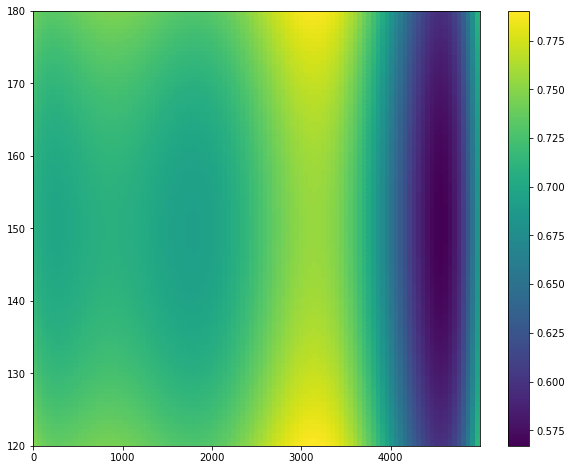

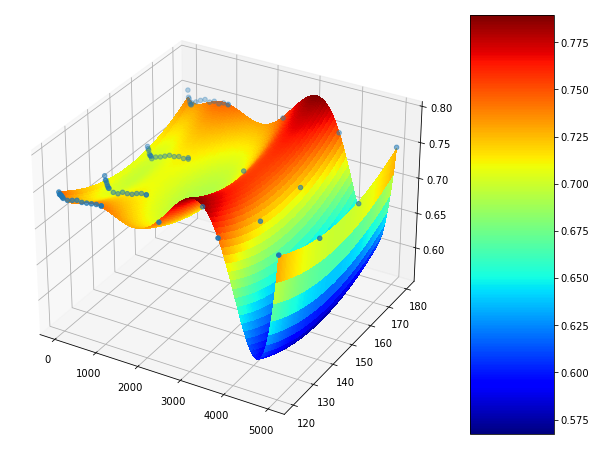

In [92]:
x1 = np.linspace(X[:,0].min(), X[:,0].max(),num = NUM_OF_PLOT_POINTS)
x2 = np.linspace(X[:,1].min(), X[:,1].max(),num = NUM_OF_PLOT_POINTS)
x1x2 = np.array(list(product(x1, x2)))
y_pred, MSE = gp.predict(x1x2, return_std=True)
X0p, X1p = x1x2[:,0].reshape(NUM_OF_PLOT_POINTS,NUM_OF_PLOT_POINTS), x1x2[:,1].reshape(NUM_OF_PLOT_POINTS,NUM_OF_PLOT_POINTS)
Zp = np.reshape(y_pred,(NUM_OF_PLOT_POINTS,NUM_OF_PLOT_POINTS))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
pcm = ax.pcolormesh(X0p, X1p, Zp)
fig.colorbar(pcm, ax=ax)
plt.show()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')            
surf = ax.plot_surface(X0p, X1p, Zp, rstride=1, cstride=1, cmap='jet', linewidth=0, antialiased=False)
ax.scatter(X[:,0],X[:,1],Y)
fig.colorbar(surf, aspect=5)
plt.show()


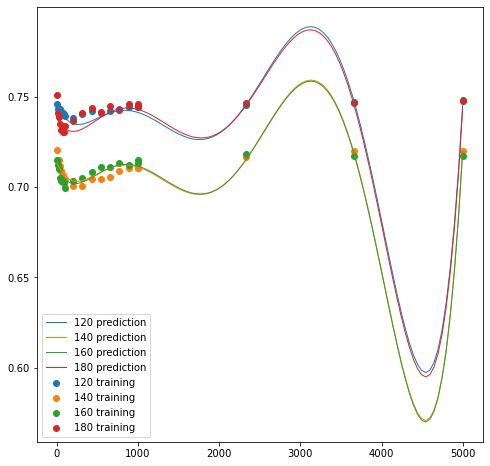

In [93]:
fig = plt.figure(figsize=(8,8))
i = 1
for temp in temp_list:
    plt.plot(x1,Zp[:,i],label = str(temp)+' prediction',lw=1)
    i += int(NUM_OF_PLOT_POINTS/3-1)
j = NUM_OF_DATA_POINTS
for temp in temp_list:
    plt.scatter (X_num,Y[j-NUM_OF_DATA_POINTS:j],label = str(temp)+' training')
    j += NUM_OF_DATA_POINTS
plt.legend()
plt.show()

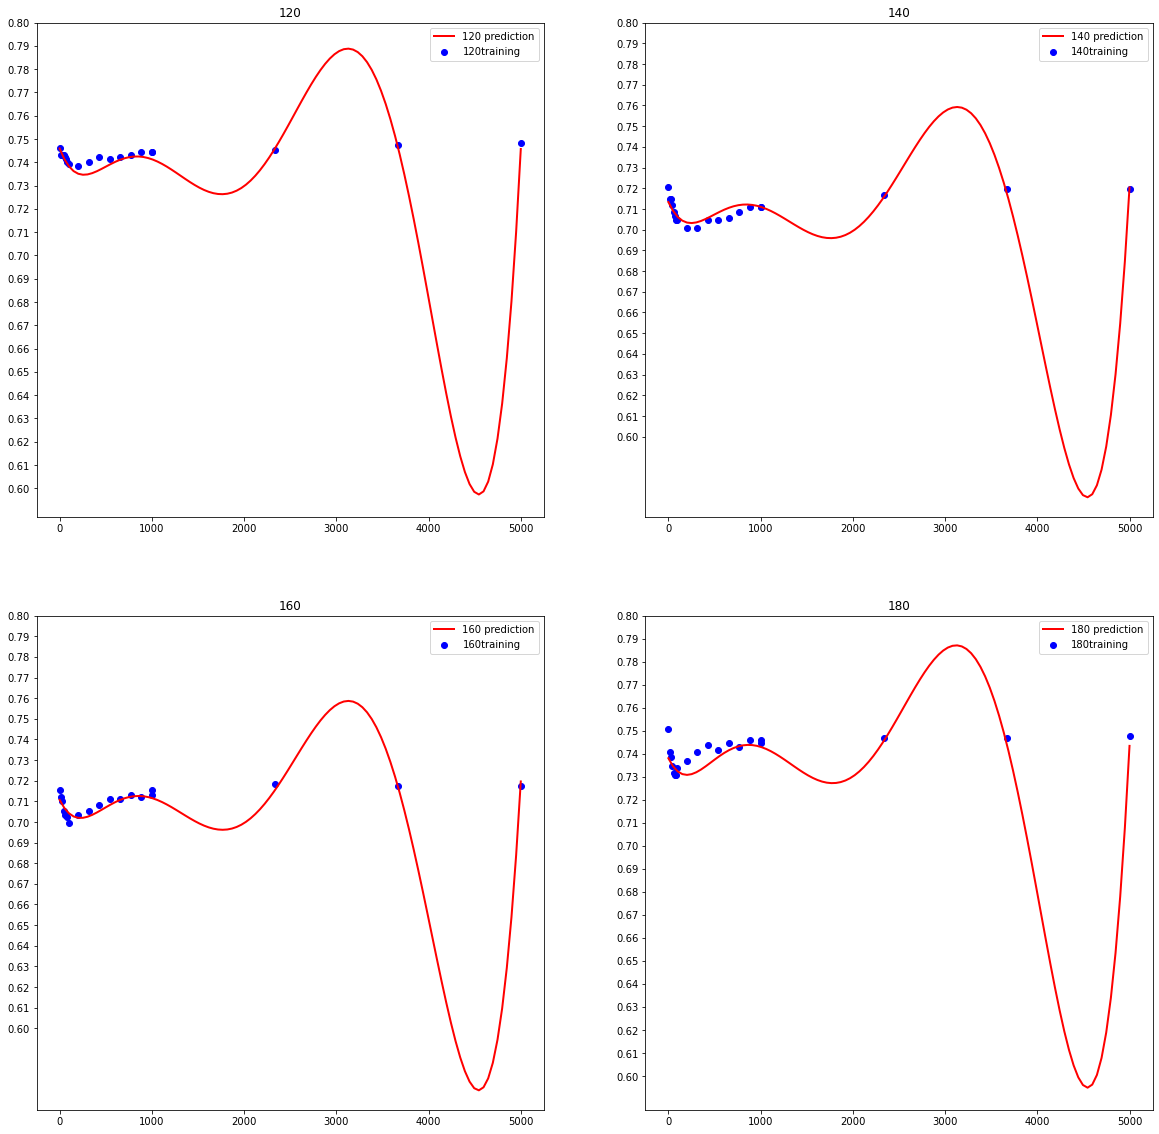

In [95]:
i = 1
j = NUM_OF_DATA_POINTS
k = 0
fig = plt.figure(figsize=(20,20))
plot_index = 1
for temp in temp_list:
    plt.subplot(2,2,plot_index),plt.plot(x1,Zp[:,i],label = str(temp)+' prediction',c='red',lw=2,zorder=3),
    plt.scatter (X_num,Y[j-NUM_OF_DATA_POINTS:j],label = str(temp)+'training',c='blue',zorder=2),
#     plt.scatter(X_,y_normal[k:k+5000],label = str(temp)+' true',s=1,c='grey',zorder=1),
    plt.yticks(np.arange(0.6,0.8,0.01)),plt.title(str(temp)),plt.legend(),plt.tight_layout

    i += int(NUM_OF_PLOT_POINTS/3-1)
    j += NUM_OF_DATA_POINTS
    k+=5000
    plot_index+=1
plt.show()